In [1]:
# Clone the repository from GitHub
!git clone https://github.com/pallavikailas/pap-smear-for-cancer.git /content/project_root

Cloning into '/content/project_root'...
remote: Enumerating objects: 1113, done.
remote: Counting objects: 100% (456/456), done.
remote: Compressing objects: 100% (407/407), done.
remote: Total 1113 (delta 68), reused 400 (delta 28), pack-reused 657 (from 1)
Receiving objects: 100% (1113/1113), 40.58 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Updating files: 100% (925/925), done.


In [2]:
# Install necessary dependencies (if you have a requirements.txt file)
!pip install -r /content/project_root/requirements.txt

In [3]:
# Adjust Python import path
import sys
sys.path.append('/content/project_root/src')  # Add the src directory to the path

In [4]:
# Import the get_data function from dataloader.py
from data_loader import get_data

# Load training data
x, y = get_data("/content/project_root/data/train")

In [5]:
# Check if data is loaded correctly
print(f"Features shape: {x.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (643, 350)
Labels shape: (643,)


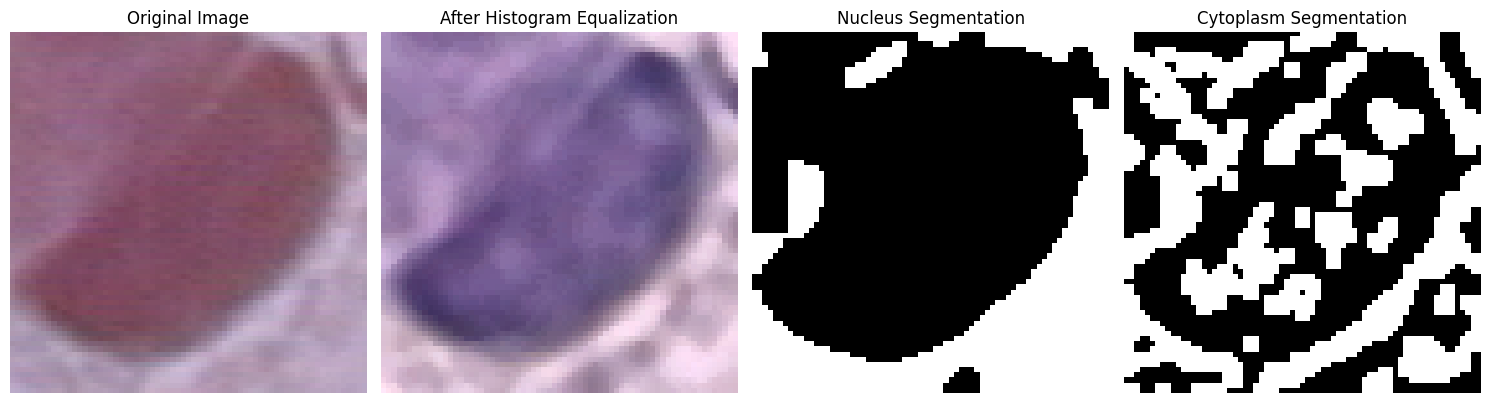

In [6]:
from feature_extraction import analyze_pap_smear, visualize_results
import cv2

# Path to an example image
image_path = "/content/project_root/data/train/carcinoma_in_situ/149143370-149143378-001.BMP"

# Analyze and visualize
features_normalized, img_eq, nucleus_mask, cytoplasm_mask = analyze_pap_smear(image_path)
visualize_results(cv2.imread(image_path), img_eq, nucleus_mask, cytoplasm_mask)

In [7]:
from train import train_random_forest, train_knn, train_svm
from sklearn.model_selection import train_test_split

# Split data
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Train models
rf_model = train_random_forest(x_train, y_train)
knn_model = train_knn(x_train, y_train)
svm_model = train_svm(x_train, y_train)

In [8]:
from evaluate import evaluate_model

# Evaluate each model
print("Random Forest:")
evaluate_model(rf_model, x_val, y_val)

print("KNN:")
evaluate_model(knn_model, x_val, y_val)

print("SVM:")
evaluate_model(svm_model, x_val, y_val)

Random Forest:
F1-Score: 67.36%
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.86      0.73        14
           1       0.80      0.57      0.67        35
           2       0.42      0.53      0.47        15
           3       1.00      0.59      0.74        22
           4       0.88      0.78      0.82         9
           5       0.88      1.00      0.93         7
           6       0.51      0.70      0.59        27

    accuracy                           0.67       129
   macro avg       0.73      0.72      0.71       129
weighted avg       0.72      0.67      0.67       129

KNN:
F1-Score: 54.12%
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.36      0.29        14
           1       0.72      0.60      0.66        35
           2       0.26      0.53      0.35        15
           3       0.79      0.50      0.61        22
           4       0.78      0

In [9]:
from sklearn.metrics import accuracy_score

rf_acc = accuracy_score(y_val, rf_model.predict(x_val))
knn_acc = accuracy_score(y_val, knn_model.predict(x_val))
svm_acc = accuracy_score(y_val, svm_model.predict(x_val))
accuracies = [rf_acc, knn_acc, svm_acc]

In [10]:
from ensemble import evaluate_ensemble

# Evaluate ensemble model
evaluate_ensemble([rf_model, knn_model, svm_model], x_val, y_val, accuracies)

Predictions shape: (3, 129, 7)
Normalized Weights: [0.37391304 0.29565217 0.33043478]
Weighted Predictions: [0.03416374 0.02527775 0.40695177 0.30300508 0.00547706 0.00497587
 0.22014873]
Ensemble F1-Score: 67.76%


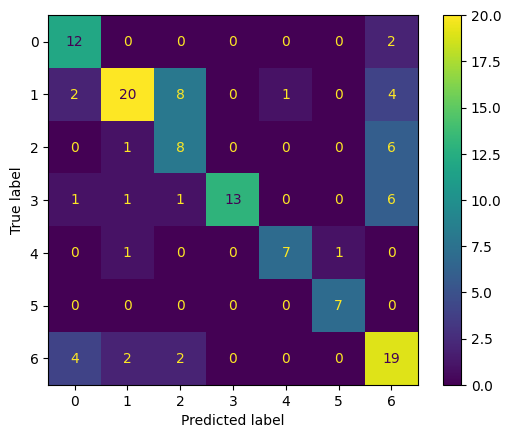

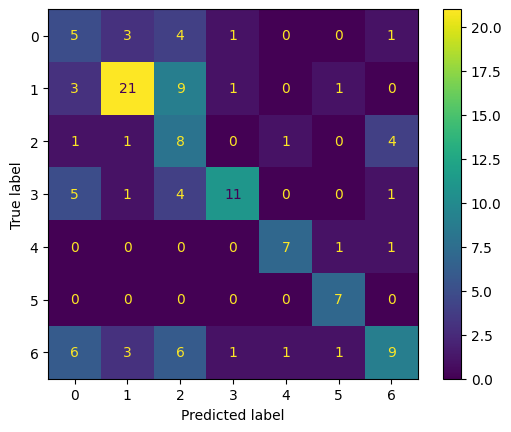

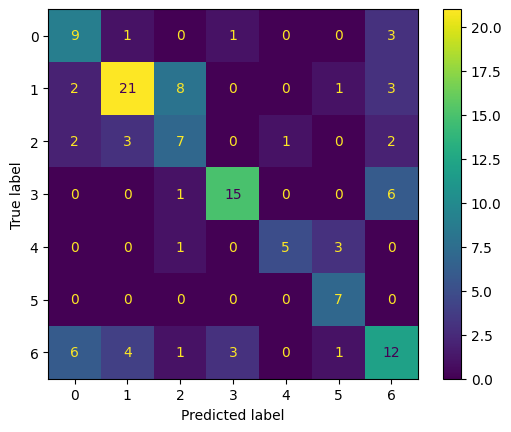

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, x_val, y_val)
plt.show()

# Display confusion matrix for KNN
ConfusionMatrixDisplay.from_estimator(knn_model, x_val, y_val)
plt.show()

# Display confusion matrix for SVM
ConfusionMatrixDisplay.from_estimator(svm_model, x_val, y_val)
plt.show()